# Parkinson's Disease Prediction - Model 3 - Neutral Network

## Importing the dpeendencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

## Loading the data

In [2]:
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
parkinsons_data.shape

(195, 24)

In [5]:
parkinsons_data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
15,phon_R01_S04_4,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,...,0.02316,0.00839,25.175,1,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
133,phon_R01_S32_6,118.747,123.723,109.836,0.00331,0.00003,0.00168,0.00171,0.00504,0.01043,...,0.01471,0.00504,25.619,1,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422


In [6]:
# Label: 'status'

In [7]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

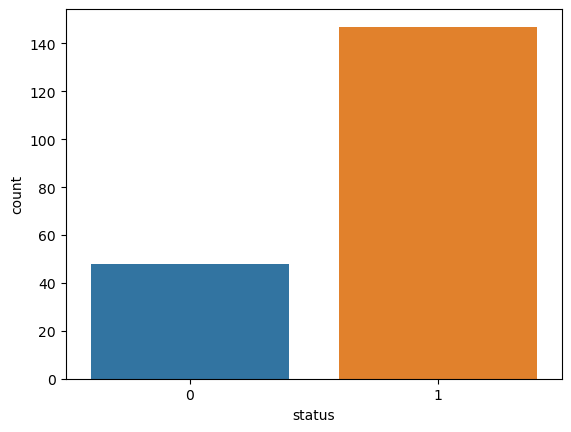

In [9]:
sns.countplot(x='status', data=parkinsons_data)
plt.show()

## Splitting the features and the label

In [12]:
X = parkinsons_data.drop(columns=['status', 'name'])
y = parkinsons_data['status']

## Splitting the data into training set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Feature Scaling the tarining and test set

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the neural network

In [17]:
X_train.shape

(156, 22)

In [18]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,425
Trainable params: 15,425
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 2s 8ms/step - loss: 0.6908 - accuracy: 0.5192
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6118 - accuracy: 0.7564
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.5493 - accuracy: 0.7564
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.7564
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.7564
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7692
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4069 - accuracy: 0.8269
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3882 - accuracy: 0.8462
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3702 - accuracy: 0.8462
Epoch 10/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3562 - accuracy: 0.8462
Epoch 11/50
5/5 [=====================

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

2/2 [==============================] - 0s 22ms/step - loss: 0.1272 - accuracy: 0.9487
0.1271786391735077
0.9487179517745972


This neural network has performed has way above expectation, even with a small dataset.